In [98]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')


from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier 

In [95]:
def confusion_mat(y, y_pred, title):
    
    f = plt.figure(figsize=(4,4))
    sb.heatmap(confusion_matrix(y, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
    
    Accuracy = "\nAccuracy: {:0.5f}".format(metrics.accuracy_score(y_pred, y))
    
    plt.xlabel('Predicted' + Accuracy)
    plt.ylabel('Actual')
    plt.title(title)

# Importing Train-Test Data

In [24]:
X_train = pd.read_csv('train_original.csv')
X_test = pd.read_csv('test_original.csv')

In [25]:
y_train = X_train["Survived"]
X_train.drop(["Survived"], axis = 1, inplace = True)
X_train

,Sex,FamilyMembers,Pclass,Fare,C,Q,S,Master,Miss,Mr,Mrs,Officer,Royalty,Adult,Child,Elderly,Teenager,Youngadult
0,0,5,3,27.9000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0,3,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,2,3,15.9000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0,3,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,3,7.8792,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,1,1,1,53.1000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
706,1,0,2,10.5000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
707,0,2,1,49.5000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
708,1,1,3,19.9667,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
y_test = X_test["Survived"]
X_test.drop(["Survived"], axis = 1, inplace = True)
X_test

,Sex,FamilyMembers,Pclass,Fare,C,Q,S,Master,Miss,Mr,Mrs,Officer,Royalty,Adult,Child,Elderly,Teenager,Youngadult
0,1,2,3,23.2500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,4,1,262.3750,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5,3,27.9000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0,3,7.7500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,3,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0,3,3,19.2583,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
174,1,0,3,8.4583,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
175,1,0,3,7.7958,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
176,1,3,1,120.0000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Explaining our Attempts

- We have decided to make use of 4 attempts with different number of features each.

- For each attempt, we will select the best few features we have, while still leaving out our non-categorical variables, which are "Fare" and "FamilyMembers"

    1. 1st Attempt: All 18 features.
    <br>
    
    2. 2nd Attempt: Best 15 features
    <br>
    
    3. 3rd Attempt: Best 10 features
    <br>
    
    4. 4th Attempt: Best 8 features

## Selecting best 15 features

In [28]:
#choosing 15 features for selection

X_best15_train = X_train.drop(["FamilyMembers", "Fare"], axis = 1)
X_best15_test = X_test.drop(["FamilyMembers", "Fare"], axis = 1)

sel_15feat = SelectKBest(chi2,k=15).fit(X_best15_train,y_train)
# True/false argument to pass into the columns of our dataframe
sel_15bool = sel_15feat.get_support()

X_15sel_train = X_best15_train[X_best15_train.columns[sel_15bool]]
X_15sel_test = X_best15_test[X_best15_test.columns[sel_15bool]]

X_15sel_train

,Sex,Pclass,C,Q,S,Master,Miss,Mr,Mrs,Officer,Royalty,Child,Elderly,Teenager,Youngadult
0,0,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
706,1,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
707,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
708,1,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Selecting best 10 features

In [29]:
#choosing 10 features for selection

X_best10_train = X_train.drop(["FamilyMembers", "Fare"], axis = 1)
X_best10_test = X_test.drop(["FamilyMembers", "Fare"], axis = 1)

sel_10feat = SelectKBest(chi2,k=10).fit(X_best10_train,y_train)
# True/false argument to pass into the columns of our dataframe
sel_10bool = sel_10feat.get_support()

X_10sel_train = X_best10_train[X_best10_train.columns[sel_10bool]]
X_10sel_test = X_best10_test[X_best10_test.columns[sel_10bool]]

X_10sel_train

,Sex,Pclass,C,S,Master,Miss,Mr,Mrs,Royalty,Child
0,0,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
705,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
706,1,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
707,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
708,1,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Selecting best 8 features

In [30]:
#choosing 8 features for selection

X_best8_train = X_train.drop(["FamilyMembers", "Fare"], axis = 1)
X_best8_test = X_test.drop(["FamilyMembers", "Fare"], axis = 1)

sel_8feat = SelectKBest(chi2,k=8).fit(X_best8_train,y_train)
# True/false argument to pass into the columns of our dataframe
sel_8bool = sel_8feat.get_support()

X_8sel_train = X_best8_train[X_best8_train.columns[sel_8bool]]
X_8sel_test = X_best8_test[X_best8_test.columns[sel_8bool]]

X_8sel_train

,Sex,Pclass,C,S,Miss,Mr,Mrs,Child
0,0,3,0.0,1.0,1.0,0.0,0.0,1.0
1,1,3,0.0,1.0,0.0,1.0,0.0,0.0
2,1,3,0.0,1.0,0.0,0.0,0.0,1.0
3,1,3,0.0,1.0,0.0,1.0,0.0,0.0
4,0,3,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
705,1,1,0.0,1.0,0.0,1.0,0.0,0.0
706,1,2,0.0,1.0,0.0,1.0,0.0,0.0
707,0,1,1.0,0.0,1.0,0.0,0.0,0.0
708,1,3,0.0,1.0,0.0,1.0,0.0,0.0


# Model 1: K-Nearest Neighbour Classification

Reference:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/knn-in-python

https://realpython.com/knn-python/#tune-and-optimize-knn-in-python-using-scikit-learn

### Explaination 
- K-Nearest Neighbors (KNN) is a supervised machine learning model algorithm that can be used for classification.
- The model classify based on data point's neighbour classification, where the neighbours are data points with similar features.
- The model will classify a data point by looking at the classification of its nearest k-neighbours, where k is a parameter that refers to the number of nearest neighbour.
- "Majority votes from the k-nearest neighbours will decide how the model classify the data point"
- The main reason why we chose this model is because it predicts the classification of a new sample point based on data points that are separated into several indiviual classes.


In [33]:
X_kn_train = X_train.copy()
X_kn_test = X_test.copy()

In [36]:
from sklearn.model_selection import GridSearchCV
search_space = {
    "n_neighbors": range(1,50),
    "weights" : ['uniform', 'distance']
}

GS = GridSearchCV(estimator=KNeighborsClassifier(),
                  param_grid= search_space,
                  scoring='accuracy',
                  cv = 10
)

## Attempt 1 - Using all features

In [107]:
GS_Attempt_1 = GS.fit(X_kn_train,y_train)
print("Grid Search Statistics")
print(GS_Attempt_1.best_estimator_)
print(GS_Attempt_1.best_score_)

y_kn_trainpred_1 = GS_Attempt_1.predict(X_kn_train)
y_kn_testpred_1 = GS_Attempt_1.predict(X_kn_test)

print()
print("Prediction Scores:")
print(f'Train accuracy: {metrics.accuracy_score(y_kn_trainpred_1, y_train)}')
print(f'Test accuracy: {metrics.accuracy_score(y__kn_testpred_1, y_test)}')


Grid Search Statistics
KNeighborsClassifier(n_neighbors=9)
0.776056338028169

Prediction Scores:
Train accuracy: 0.8169014084507042
Test accuracy: 0.7528089887640449


## Attempt 2 - Using best **15** features

In [108]:
GS_Attempt_2 = GS.fit(X_15sel_train,y_train)
print("Grid Search Statistics")
print(GS_Attempt_2.best_estimator_)
print(GS_Attempt_2.best_score_)

y_kn_trainpred_2 = GS_Attempt_2.predict(X_15sel_train)
y_kn_testpred_2 = GS_Attempt_2.predict(X_15sel_test)

print()
print("Prediction Scores:")
print(f'Train accuracy: {metrics.accuracy_score(y_kn_trainpred_2, y_train)}')
print(f'Test accuracy: {metrics.accuracy_score(y_kn_testpred_2, y_test)}')


Grid Search Statistics
KNeighborsClassifier(n_neighbors=10)
0.823943661971831

Prediction Scores:
Train accuracy: 0.8352112676056338
Test accuracy: 0.7640449438202247


## Attempt 3 - Using best **10** features

In [109]:
GS_Attempt_3 = GS.fit(X_10sel_train,y_train)
print("Grid Search Statistics")
print(GS_Attempt_3.best_estimator_)
print(GS_Attempt_3.best_score_)

y_kn_trainpred_3 = GS_Attempt_3.predict(X_10sel_train)
y_kn_testpred_3 = GS_Attempt_3.predict(X_10sel_test)

print()
print("Prediction Scores:")
print(f'Train accuracy: {metrics.accuracy_score(y_kn_trainpred_3, y_train)}')
print(f'Test accuracy: {metrics.accuracy_score(y_kn_testpred_3, y_test)}')


Grid Search Statistics
KNeighborsClassifier(n_neighbors=22, weights='distance')
0.8267605633802818

Prediction Scores:
Train accuracy: 0.8394366197183099
Test accuracy: 0.8089887640449438


## Attempt 4 - Using best **8** features

In [112]:
GS_Attempt_4 = GS.fit(X_8sel_train,y_train)
print("Grid Search Statistics")
print(GS_Attempt_4.best_estimator_)
print(GS_Attempt_4.best_score_)

y_kn_trainpred_4 = GS_Attempt_4.predict(X_8sel_train)
y_kn_testpred_4 = GS_Attempt_4.predict(X_8sel_test)

print()
print("Prediction Scores:")
print(f'Train accuracy: {metrics.accuracy_score(y_kn_trainpred_4, y_train)}')
print(f'Test accuracy: {metrics.accuracy_score(y_kn_testpred_4, y_test)}')


Grid Search Statistics
KNeighborsClassifier(n_neighbors=22, weights='distance')
0.823943661971831

Prediction Scores:
Train accuracy: 0.8380281690140845
Test accuracy: 0.8146067415730337


### Analysis:

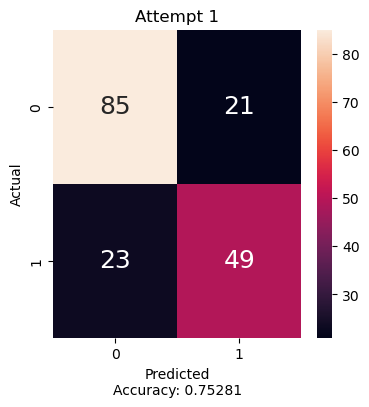

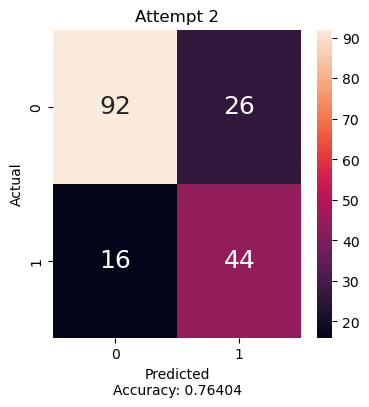

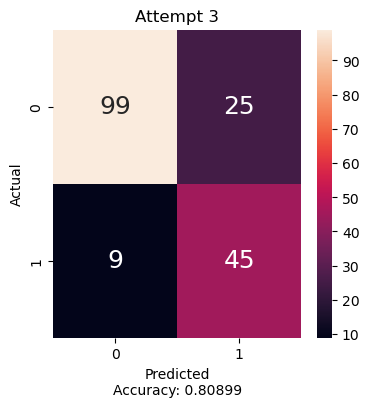

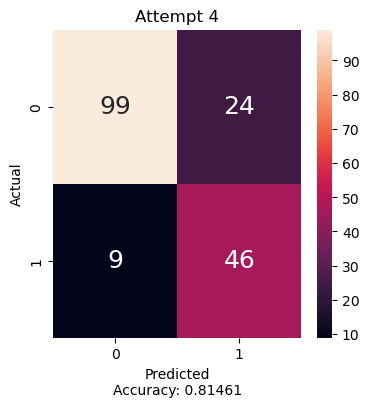

In [111]:
confusion_mat(y_kn_testpred_1, y_test, "Attempt 1")
plt.show()
confusion_mat(y_kn_testpred_2, y_test, "Attempt 2")
plt.show()
confusion_mat(y_kn_testpred_3, y_test, "Attempt 3")
plt.show()
confusion_mat(y_kn_testpred_4, y_test, "Attempt 4")
plt.show()

### Conclusion:

- For KNN model, we can see that as we remove the variables with least importance, the prediction accuracy increases.


- Overall, the prediction accuracy for the train dataset is relatively equal across our 4 attempts.


- The best attempt is attempt 4, using 8 variables we identify as most important based on the chi-squared test.


- This is likely to be due to the **Curse of Dimensionality**.



#### Curse of Dimensionality

- The idea behind KNN algorithms is based on the "close" a data point is to another.

- Such an algorithm will be greatly affected when the number of dimensions increse.

    - Adding new dimension affects the closest distance between 2 points.
    - The closest distance between two points approaches the average distance between points, which makes it harder for KNN models to predict accurately.
    
- In order to prevent such an issue, a much larger data set is required, but this may also lead to the problem of overfitting.

- In our case, performing one-hot encoding has increased the dimension of our dataset and since our dataset is limited, it is likely that our KNN model is affected by the curse of dimensionality.

- This can be seen when the accuracy of the model increases the lower the dimension of our dataset is, as we remove the less important variables.

# Model 2: XGBoost

References:

https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/
https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

### Explaination

- It is an improvised implementation of a gradient boosting algorithm.

- It works by iteratively adding decision tres to a model, and with each new tree, it tries to correct errors of the previous tree.

  - A weak learners offer vital information that comes together to produce a strong learner when effectively combined together.
  - Each tree learns and boost from the previous tree, thus improving on the errors of the previous tree.


- Our reasons for choosing this model were as follows:
    1. It allows for parallel creation of trees.
    
    <br>
    2. Trees pruning using depth-first approach.
    
    <br>    
    3. Regularization to avoid overfitting.
    
    <br>
    4. Handle missing values using sparse approach.
    
    <br>
    5. Inbuilt cross-validation.

In [48]:
X_xgb_train = X_train.copy()
X_xgb_test = X_test.copy()

In [50]:
xgb_param = {'n_estimators' : [100,200,300],
            'learning_rate': [0.2, 0.3, 0.4],
             'max_depth': range(5,10),
            }
gsXGB = GridSearchCV(estimator = XGBClassifier(), 
                     param_grid = xgb_param, 
                     cv=5, 
                     scoring="accuracy", 
                     verbose = 1)


## Attempt 1 - Using all features

In [113]:
xgb_Attempt_1 = gsXGB.fit(X_xgb_train,y_train)
print("Grid Search Statistics")
print(xgb_Attempt_1.best_estimator_)
print("GS Score: ", xgb_Attempt_1.best_score_)

y_xgb_trainpred_1 = xgb_Attempt_1.predict(X_xgb_train)
y_xgb_testpred_1 = xgb_Attempt_1.predict(X_xgb_test)

print()
print("Prediction Scores:")

print(f'Train accuracy: {metrics.accuracy_score(y_xgb_trainpred_1, y_train)}')
print(f'Test accuracy: {metrics.accuracy_score(y_xgb_testpred_1, y_test)}')


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Grid Search Statistics
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
GS Score:  0.819718309859155

Prediction Scores:
Train accuracy: 0.9380281690140845
Test accuracy: 0.8370786516853933


## Attempt 2 - Using best **15** features

In [114]:
xgb_Attempt_2 = gsXGB.fit(X_15sel_train,y_train)
print("Grid Search Statistics")
print(xgb_Attempt_2.best_estimator_)
print("GS Score: ", xgb_Attempt_2.best_score_)

y_xgb_trainpred_2 = xgb_Attempt_2.predict(X_15sel_train)
y_xgb_testpred_2 = xgb_Attempt_2.predict(X_15sel_test)

print()
print("Prediction Scores:")

print(f'Train accuracy: {metrics.accuracy_score(y_xgb_trainpred_2, y_train)}')
print(f'Test accuracy: {metrics.accuracy_score(y_xgb_testpred_2, y_test)}')


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Grid Search Statistics
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
GS Score:  0.8126760563380282

Prediction Scores:
Train accuracy: 0.8450704225352113
Test accuracy: 0.7471910112359551


## Attempt 3 - Using best **10** features

In [116]:
xgb_Attempt_3 = gsXGB.fit(X_10sel_train,y_train)
print("Grid Search Statistics")
print(xgb_Attempt_3.best_estimator_)
print("GS Score: ", xgb_Attempt_3.best_score_)

y_xgb_trainpred_3 = xgb_Attempt_3.predict(X_10sel_train)
y_xgb_testpred_3 = xgb_Attempt_3.predict(X_10sel_test)

print()
print("Prediction Scores:")
print(f'Train accuracy: {metrics.accuracy_score(y_xgb_trainpred_3, y_train)}')
print(f'Test accuracy: {metrics.accuracy_score(y_xgb_testpred_3, y_test)}')


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Grid Search Statistics
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
GS Score:  0.8309859154929577

Prediction Scores:
Train accuracy: 0.8380281690140845
Test accuracy: 0.8146067415730337


## Attempt 4 - Using best **8** features

In [117]:
xgb_Attempt_4 = gsXGB.fit(X_8sel_train,y_train)
print("Grid Search Statistics")
print(xgb_Attempt_4.best_estimator_)
print("GS Score: ", xgb_Attempt_4.best_score_)

y_xgb_trainpred_4 = xgb_Attempt_4.predict(X_8sel_train)
y_xgb_testpred_4 = xgb_Attempt_4.predict(X_8sel_test)

print()
print("Prediction Scores:")
print(f'Train accuracy: {metrics.accuracy_score(y_xgb_trainpred_4, y_train)}')
print(f'Test accuracy: {metrics.accuracy_score(y_xgb_testpred_4, y_test)}')


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Grid Search Statistics
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
GS Score:  0.8352112676056338

Prediction Scores:
Train accuracy: 0.8380281690140845
Test accuracy: 0.8146067415730337


### Analysis:

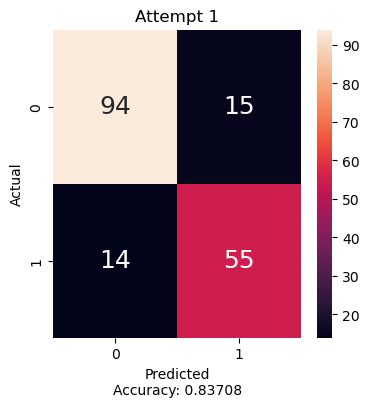

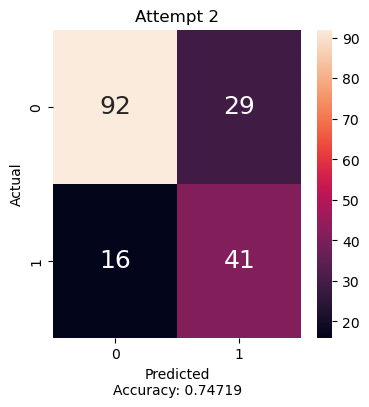

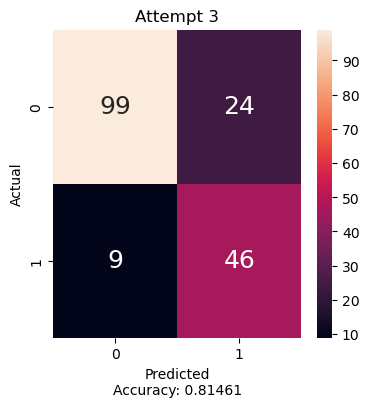

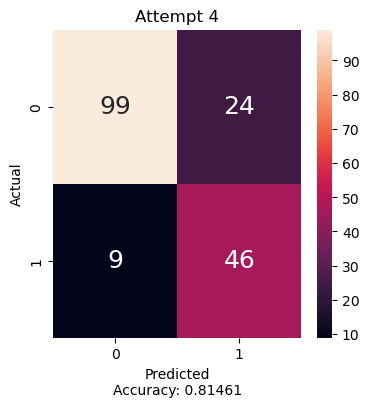

In [118]:
confusion_mat(y_xgb_testpred_1, y_test, "Attempt 1")
plt.show()
confusion_mat(y_xgb_testpred_2, y_test, "Attempt 2")
plt.show()
confusion_mat(y_xgb_testpred_3, y_test, "Attempt 3")
plt.show()
confusion_mat(y_xgb_testpred_4, y_test, "Attempt 4")
plt.show()

### Conclusion:

- For XGBoost model, we can see that as we reduce the no. variables, prediction accuracy decreases.


- Overall, the prediction accuracy using all available variables is the most accurate.


- This is likely to be due to the XGBoost being a robust model with its own built-in methods of improving from previous errors to reduce over-fitting and increase accuracy.


- In our case, since our dataset is relatively small, removing variables might end up worse off for robust models such as XGBoost.

    - XGBoost has its own feature importance function, which roughly estimates the importance of each features provided as it trains with dataset provided.
    - In our case, due to our limited dataset, perhaps it is better to allow the model to train with all the variables.


# Model 3: Random Forest Classifier 

Reference:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Explanation:

- Random forest consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes the model’s prediction.


- We chose random forest classifier because the a large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the indiviual constituent models.


- We chose this model as it is frequently used for classification and regression tasks due to its high accuracy, robustness, feature importance and scalability. 


- It also reduces overfitting by averaging multiple decision trees and isless sensitive to noise and outliers in the data.

In [99]:
X_rfc_train = X_train.copy()
X_rfc_test = X_test.copy()
X_rfc_train.head()

RF_model = RandomForestClassifier(n_estimators = 100)
RF_model.fit(X_rfc_train,y_train)

RandomForestClassifier()

In [100]:
#Grid Search
parameters = { 'n_estimators' : (10,20,30,50,70,90,100),
                'criterion' : ('gini', 'entropy'),
                'max_depth' : (3,5,7,9,10),
                'max_features' : ('auto', 'sqrt'),
                'min_samples_split' : (2,4,6)
    
}

RF_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1,oob_score = False), param_grid = parameters, cv = 3, verbose = True)

RF_grid_model = RF_grid.fit(X_rfc_train,y_train)

RF_grid_model.best_estimator_
print("Best score:")
RF_grid_model.best_score_


Fitting 3 folds for each of 420 candidates, totalling 1260 fits
Best score:


0.8535125986316717

## Attempt 1 - Using all features

In [101]:
# build model with best estimates
RF_model = RandomForestClassifier(max_depth=9,max_features='auto',min_samples_split=6, n_estimators = 20,n_jobs = -1)

RF_model.fit(X_rfc_train,y_train)

y_pred = RF_model.predict(X_rfc_test)

print(f'Test accuracy: {RF_model.score(X_rfc_test,y_test): .3f}')
print(f'Train accuracy: {RF_model.score(X_rfc_train,y_train): .3f}')
print("10-fold cross-validation score:")
print (np.mean(cross_val_score(RF_model, X_rfc_train, y_train, cv=10)))

Test accuracy:  0.809
Train accuracy:  0.887
10-fold cross-validation score:
0.8352112676056338


## Attempt 2 - Using best **15** features

In [125]:
RF_model = RandomForestClassifier(n_estimators = 100)
RF_model.fit(X_15sel_train,y_train)


#Grid Search
parameters = { 'n_estimators' : (10,20,30,50,70,90,100),
                'criterion' : ('gini', 'entropy'),
                'max_depth' : (3,5,7,9,10),
                'max_features' : ('auto', 'sqrt'),
                'min_samples_split' : (2,4,6)
}

RF_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1,oob_score = False), param_grid = parameters, cv = 3, verbose = True)
RF_grid_model = RF_grid.fit(X_15sel_train,y_train)
RF_grid_model.best_estimator_
RF_grid_model.best_score_

# build model with best estimates
RF_model = RandomForestClassifier(max_depth=9,max_features='auto',min_samples_split=6, n_estimators = 20,n_jobs = -1)
RF_model.fit(X_15sel_train,y_train)

y_rf_testpred_2 = RF_model.predict(X_15sel_test)


print(f'Test accuracy: {RF_model.score(X_15sel_test,y_test): .3f}')
print(f'Train accuracy: {RF_model.score(X_15sel_train,y_train): .3f}')
print("10-fold cross validation score:")
print (np.mean(cross_val_score(RF_model, X_15sel_train, y_train, cv=10)))


Fitting 3 folds for each of 420 candidates, totalling 1260 fits
Test accuracy:  0.798
Train accuracy:  0.844
10-fold cross validation score:
0.8154929577464788


## Attempt 3 Using best **10** features

In [128]:
RF_model = RandomForestClassifier(n_estimators = 100)
RF_model.fit(X_10sel_train,y_train)


#Grid Search
parameters = { 'n_estimators' : (10,20,30,50,70,90,100),
                'criterion' : ('gini', 'entropy'),
                'max_depth' : (3,5,7,9,10),
                'max_features' : ('auto', 'sqrt'),
                'min_samples_split' : (2,4,6)
}

RF_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1,oob_score = False), param_grid = parameters, cv = 3, verbose = True)
RF_grid_model = RF_grid.fit(X_10sel_train,y_train)
RF_grid_model.best_estimator_
RF_grid_model.best_score_

# build model with best estimates
RF_model = RandomForestClassifier(max_depth=9,max_features='auto',min_samples_split=6, n_estimators = 20,n_jobs = -1)
RF_model.fit(X_10sel_train,y_train)

y_rf_testpred_3 = RF_model.predict(X_10sel_test)

print(f'Test accuracy: {RF_model.score(X_10sel_test,y_test): .3f}')
print(f'Train accuracy: {RF_model.score(X_10sel_train,y_train): .3f}')
print("10-fold cross validation score:")
print (np.mean(cross_val_score(RF_model, X_10sel_train, y_train, cv=10)))


Fitting 3 folds for each of 420 candidates, totalling 1260 fits
Test accuracy:  0.815
Train accuracy:  0.838
10-fold cross validation score:
0.8253521126760563


## Attempt 4 - Using best **8** features

In [129]:
RF_model = RandomForestClassifier(n_estimators = 100)
RF_model.fit(X_8sel_train,y_train)


#Grid Search
parameters = { 'n_estimators' : (10,20,30,50,70,90,100),
                'criterion' : ('gini', 'entropy'),
                'max_depth' : (3,5,7,9,10),
                'max_features' : ('auto', 'sqrt'),
                'min_samples_split' : (2,4,6)
}

RF_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1,oob_score = False), param_grid = parameters, cv = 3, verbose = True)
RF_grid_model = RF_grid.fit(X_8sel_train,y_train)
RF_grid_model.best_estimator_
RF_grid_model.best_score_

# build model with best estimates
RF_model = RandomForestClassifier(max_depth=9,max_features='auto',min_samples_split=6, n_estimators = 20,n_jobs = -1)
RF_model.fit(X_8sel_train,y_train)

y_rf_testpred_4 = RF_model.predict(X_8sel_test)

print(f'Test accuracy: {RF_model.score(X_8sel_test,y_test): .3f}')
print(f'Train accuracy: {RF_model.score(X_8sel_train,y_train): .3f}')
print("10-fold cross validation score:")
print (np.mean(cross_val_score(RF_model, X_8sel_train, y_train, cv=10)))


Fitting 3 folds for each of 420 candidates, totalling 1260 fits
Test accuracy:  0.815
Train accuracy:  0.835
10-fold cross validation score:
0.8253521126760562


### Analysis

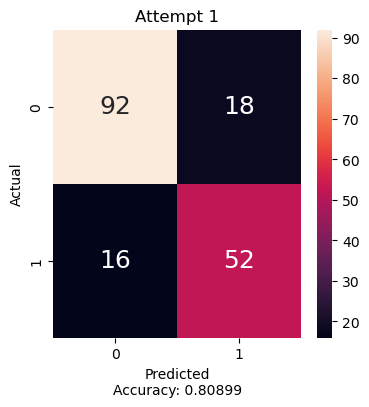

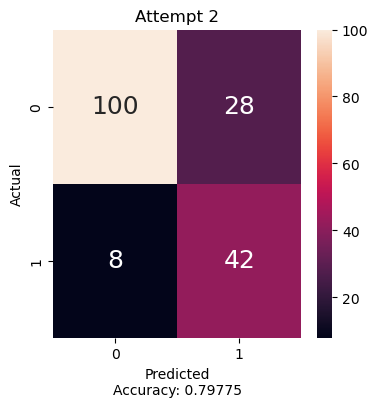

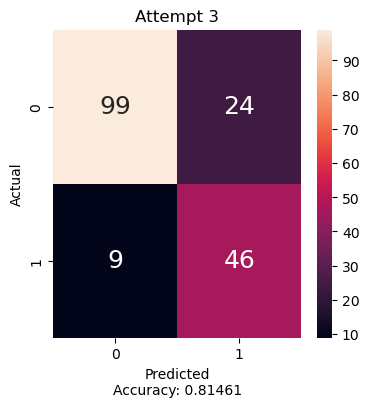

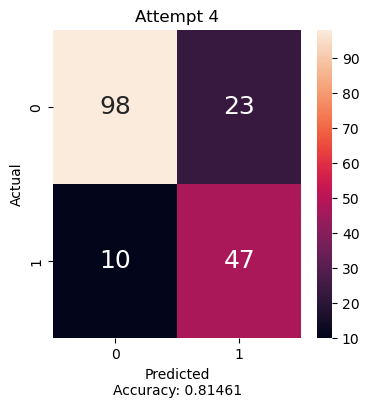

In [130]:
confusion_mat(y_pred, y_test, "Attempt 1")
plt.show()
confusion_mat(y_rf_testpred_2, y_test, "Attempt 2")
plt.show()
confusion_mat(y_rf_testpred_3, y_test, "Attempt 3")
plt.show()
confusion_mat(y_rf_testpred_4, y_test, "Attempt 4")
plt.show()

#### CONCLUSION FOR RANDOM FOREST CLASSIFIER

- For the random forest classifier, the two attempts in whcich we took 10 and 8 features yielded the best accuracy on the test data set.


- On the other hand, the training accuracy increased as we include more and more varaibles.

- This is likely because we ecountered the issue of **over-fitting**.

#### Over-fitting

- Over-fitting happens when a model is to closely fitted to the specific details of the training dataset.

- As a result, the model picks up on specific patterns observed in the training dataset, rather than generalising the patterns.

- This causes the model to make more accurate prediction on the training dataset, but when used to predict unseen dataset, it will not do as well.

- This is likely the issue of what happened here. As we reduce the variables used to train, we can see that the accuracy on the training dataset decreases, but the accuracy on the test dataset improves. Hence, we can conclude that over-fitting is likely the issue, which is why selecting 8 or 10 most important variable will help us in better predicting unseen data.

# Overall Conclusion